In [1]:
import numpy as np
#均方误差函数，mean squared error
def mse(y,t):
    return 0.5*np.sum((y-t)**2)


In [2]:
t=[0,0,1,0,0,0,0,0,0,0]
t=np.array(t)
y=[0.1,0.2,0.6,0.1,0.0,0.0,0.0,0.0,0.0,0.0]
y=np.array(y)

In [4]:
loss=mse(y,t)
loss

np.float64(0.11000000000000003)

In [6]:
y2=np.array([0.1,0.6,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0])
loss2=mse(y2,t)
loss2

np.float64(0.51)

In [7]:
#交叉熵误差，cross entropy error
def cross_entropy_error(y,t):
    delta= 1e-7 #防止log(0)的情况,返回NaN
    return -np.sum(t*np.log(y+delta))

In [8]:
loss3=cross_entropy_error(y,t)
loss3

np.float64(0.510825457099338)

In [9]:
loss4=cross_entropy_error(y2,t)
loss4

np.float64(1.6094374124342252)

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
x_train, x_test = digits.data[:600],digits.data[600:]
y_train,y_test = digits.target[:600],digits.target[600:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(600, 64)
(1197, 64)
(600,)
(1197,)


In [20]:
train_size = x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]
print(x_batch.shape)

(10, 64)


In [21]:
np.random.choice(60000,10)

array([55851, 37127, 22271, 25896, 44370, 54681, 33724, 36890, 53988,
       35775], dtype=int32)

In [22]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        # 转化为2D
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size


In [23]:
#如果t不是one-hot编码，而是数字标签
def cee(y,t):
    if y.ndim == 1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [24]:
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)


In [25]:
def function_2(x):
    return x[0]**2+x[1]**2
    #或者return np.sum(x**2)

In [26]:
def function_tmp1(x0):
    return x0**2 + 4.0**2
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [27]:
def function_tmp1(x1):
    return x1**2 + 4.0**2
numerical_diff(function_tmp1,4.0)

7.999999999999119

In [29]:
#实现梯度
def numerical_gradient(f,x):
    h=1e-4
    grad = np.zeros_like(x) #创建与x同形状的数组
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val
    return grad


In [30]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [34]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
    return x

In [35]:
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x)

array([-0.39785867,  0.53047822])

In [36]:
#修改lr试试看
def gradient_descent_2(f,init_x,lr=0.1,step_num=100):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
    return x
gradient_descent_2(function_2,init_x)

array([-8.10452420e-11,  1.08060323e-10])

可以发现改变学习率，使得梯度下降的最后结果更加接近（0，0）这一个点
下面可以看一下改变学习率对于最后梯度下降的影响

In [40]:
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)

array([-1.29863664e+13,  1.28237547e+13])

In [41]:
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)

array([-1.29863664e+13,  1.28237547e+13])

In [43]:
def function_3(x):
    return x[0]**2+x[1]**2
init_x=np.array([-3.,4.])
def gradient_descend_3(f,init_x,lr,step_num):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
    return x
init_x=np.array([-3.,4])
gradient_descend_3(function_3,init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [44]:
gradient_descend_3(function_3,init_x,lr=10.0,step_num=100)

array([ 2.34235971e+12, -3.96091057e+12])

In [45]:
gradient_descend_3(function_3,init_x,lr=1e-10,step_num=100)

array([ 2.34235971e+12, -3.96091057e+12])

In [46]:
init_x=np.array([-3.,4])
gradient_descend_3(function_3,init_x,lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

In [47]:
init_x=np.array([-3.,4])
gradient_descend_3(function_3,init_x,lr=10.0,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [48]:
def softmax(x):
    c=np.max(x)
    exp_a= np.exp(x-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [55]:
def cross_entropy_error(y,t):
    delta= 1e-7
    if y.ndim==0:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_szie=y.shape[0]
    return -np.sum(t*np.log(y+delta))/batch_size

In [50]:
#简单神经网络
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #采用高斯分布/正态分布进行初始化
    def predict(self,x):
        return np.dot(x,self.W)
    def loss(self,x,t):
        z=self.predict(x)
        y=softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [51]:
net=simpleNet()
print(net.W)

[[-1.2820929   0.93764713  0.52998645]
 [ 0.35327828 -0.73616693 -0.606531  ]]


In [52]:
x=np.array([0.6,0.9])
p = net.predict(x)
print(p)

[-0.45130528 -0.09996196 -0.22788603]


In [53]:
np.argmax(p)

np.int64(1)

In [56]:
t=np.array([0,1,0])
net.loss(x,t)

np.float64(0.09492076249958346)

In [58]:
t=np.array([1,0,0])
net.loss(x,t)

np.float64(0.1300550841909898)

loss function损失函数，越小越好！越大越坏！ 坏坏~

In [59]:
def f(W):
    return net.loss(x,t)
dW = numerical_gradient(f,net.W)
print(dW)

IndexError: index 2 is out of bounds for axis 0 with size 2

In [61]:
numerical_gradient(function_2,np.array([[3.0,4.0],[2.,3.]]))

IndexError: index 2 is out of bounds for axis 0 with size 2

In [62]:
def numerical_gradient_edited(f,x):
    h=1e-4
    grad=np.zeros_like(x)
    it = np.nditer(x,flags=["multi_index"],op_flags=["readwrite"])
    while not it.finished:
        idx=it.multi_index
        original_value = x[idx]
        x[idx] = original_value + h
        fxh1=f(x)
        x[idx] = original_value - h
        fxh2=f(x)
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = original_value
        it.iternext()
    return grad

In [63]:
numerical_gradient_edited(function_2,np.array([[3.0,4.0],[2.,3.]]))

ValueError: setting an array element with a sequence.

之前，numerical_gradient(function_2,np.array([[3.0,4.0],[2.,3.]]))拿这个做测试，是非常错误的!
因为我们注意到function2: x[0]**2+x[1]**2,这个表达式只需要输入两个参数即可，但是我尝试输入一个形状为（2，2）的矩阵进去，书中给的例子是f(W): net.loss(x,t), 在loss里面用到的是cross_entropy_error: 具体的表达式：-np.sum(t*np.log(y+h))/batch_size，里面就是运用了np的一些运算，所以自然而然可以在输入的时候输入一些多维度的np.array

In [64]:
numerical_gradient_edited(f,net.W)

array([[-0.04365709,  0.02322284,  0.02043425],
       [-0.06548563,  0.03483426,  0.03065137]])

这时候跑通了，并且形状也是没有问题的，可以认为是numerical_gradient_edited修改之后正确了。
现在有一个疑问，就是为什么照着书上的代码敲，我的就会出现问题，但是书中的代码就没有问题呢？
因为在导入numerical_gradient函数的时候，书中直接用储存在别处的函数的

In [65]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [68]:
#简单实现以下两层神经网络的类
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params = {}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)
        return y
    def loss(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)
        accuracy = np.sum(y==t)/float(y.shape[0])
        return accuracy
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
        grads = {}
        grads['W1']=numerical_gradient_edited(loss_W,self.params['W1'])
        grads['b1']=numerical_gradient_edited(loss_W,self.params['b1'])
        grads['W2']=numerical_gradient_edited(loss_W,self.params['W2'])
        grads['b2']=numerical_gradient_edited(loss_W,self.params['b2'])
        return grads


In [69]:
net=TwoLayerNet(input_size=784,hidden_size=100,output_size=100)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 100)
(100,)


In [70]:
x=np.random.rand(100,784)
y=net.predict(x)

In [71]:
x=np.random.rand(100,784)
t=np.random.rand(100,10)
grads=net.numerical_gradient(x,t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b1'].shape)

(784, 100)
(100,)
(100, 100)
(100,)


In [72]:
from sklearn.datasets import load_digits
digits = load_digits()
x_train, x_test = digits.data[600:],digits.data[:600]
y_train,y_test = digits.target[600:],digits.target[:600]
# 注意训练集和测试集的比例最好 7：3， 8：2
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape)

(1197, 64)
(600, 64)
(1197,)
(600,)


In [ ]:
train_loss_list=[]
#超参数
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

network = TwoLayerNet (input_size=64,hidden_size=50,output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    #计算梯度
    grad = network.numerical_gradient(x_batch,y_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
    loss = network.loss(x_batch,y_batch)
    train_loss_list.append(loss)



AxisError: axis 1 is out of bounds for array of dimension 1

出现这个报错说明在TwoLayerNet这个类里面的loss函数出现了矩阵形状的问题，导致axis=1找不到；
现在可以有两种解决办法：1.修改loss方法；2.在输入数据前转化形状即可

In [75]:
train_loss_list=[]
#超参数
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

network = TwoLayerNet (input_size=64,hidden_size=50,output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    #在输入numerical_gradient之前需要修改形状
    x_batch = x_batch.reshape(1,-1)
    y_batch = y_batch.reshape(1,-1)
    #计算梯度
    grad = network.numerical_gradient(x_batch,y_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
    loss = network.loss(x_batch,y_batch)
    train_loss_list.append(loss)


ValueError: shapes (1,6400) and (64,50) not aligned: 6400 (dim 1) != 64 (dim 0)

In [77]:
train_loss_list=[]
#超参数
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

network = TwoLayerNet (input_size=64,hidden_size=50,output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    #计算梯度
    grad = network.numerical_gradient(x_batch,y_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
    loss = network.loss(x_batch,y_batch)
    train_loss_list.append(loss)


AxisError: axis 1 is out of bounds for array of dimension 1

这边给出的报错显示是loss函数里面使用到axis=1的地方，出现问题，所以之前在那里修改x.reshape(1,-1)的思路是错的，要修改的地方直接是
loss函数中y的shape

In [ ]:
#简单实现以下两层神经网络的类
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params = {}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)
        return y
    def loss(self,x,t):
        y=self.predict(x)
        return cross_entropy_error(y,t)
    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)
        accuracy = np.sum(y==t)/float(y.shape[0])
        return accuracy
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
        grads = {}
        grads['W1']=numerical_gradient_edited(loss_W,self.params['W1'])
        grads['b1']=numerical_gradient_edited(loss_W,self.params['b1'])
        grads['W2']=numerical_gradient_edited(loss_W,self.params['W2'])
        grads['b2']=numerical_gradient_edited(loss_W,self.params['b2'])
        return grads


In [80]:
train_loss_list=[]
#超参数
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

network = TwoLayerNet (input_size=64,hidden_size=50,output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    #计算梯度
    grad = network.numerical_gradient(x_batch,y_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
    loss = network.loss(x_batch,y_batch)
    train_loss_list.append(loss)


AxisError: axis 1 is out of bounds for array of dimension 1

这边依旧是有错误的原因，需要修改原来TwoLayerNet里面的numerical_gradient_edited方法.
解决方法是把原来TwoLayerNet里面的numerical_gradient方法删除

In [81]:
#简单实现以下两层神经网络的类
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params = {}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)
        return y
    def loss(self,x,t):
        y=self.predict(x)
        return cross_entropy_error(y,t)
    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)
        accuracy = np.sum(y==t)/float(y.shape[0])
        return accuracy
    


In [82]:
def numerical_gradient_net(net,x,t):
    grads={}
    h=1e-4
    for key in net.params:
        param = net.params[key]
        grad = np.zeros_like(param)
        it = np.nditer(param,flags=['multi_index'],op_flags=['readwrite'])
        while not it.finished:
            idx=it.multi_index
            original_val = param[idx]
            #f(x+h)
            param[idx]=original_val + h
            loss1=net.loss(x,t)
            #f(x-h)
            param[idx]=original_val - h
            loss2=net.loss(x,h)
            grad[idx]=(loss1-loss2)/(2*h)
            #恢复原值
            param[idx] = original_val
            it.iternext()
        grads[key]=grad
    return grads

In [83]:
train_loss_list=[]
#超参数
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

network = TwoLayerNet (input_size=64,hidden_size=50,output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    #计算梯度
    grad = numerical_gradient_net(network,x_batch,y_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
    loss = network.loss(x_batch,y_batch)
    train_loss_list.append(loss)

ValueError: operands could not be broadcast together with shapes (100,) (100,10) 

现在这个问题又出在cross_entropy_error这个函数上面了

In [95]:
def cross_entropy_error_new(y,t):
    delta=1e-7
    if t.ndim ==1:
        return -np.sum(np.log(y[np.arange(y.shape[0]),t]+delta))/y.shape[0]
    elif t.ndim==2:
        return -np.sum(t*np.log(y+delta))/y.shape[0]
    

In [98]:
#简单实现以下两层神经网络的类
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params = {}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)
        return y
    def loss(self,x,t):
        y=self.predict(x)
        return cross_entropy_error_new(y,t)
    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)
        accuracy = np.sum(y==t)/float(y.shape[0])
        return accuracy
    


In [97]:
def numerical_gradient_net(net,x,t):
    grads={}
    h=1e-4
    for key in net.params:
        param = net.params[key]
        grad = np.zeros_like(param)
        it = np.nditer(param,flags=['multi_index'],op_flags=['readwrite'])
        while not it.finished:
            idx=it.multi_index
            original_val = param[idx]
            #f(x+h)
            param[idx]=original_val + h
            loss1=net.loss(x,t)
            #f(x-h)
            param[idx]=original_val - h
            loss2=net.loss(x,t)
            grad[idx]=(loss1-loss2)/(2*h)
            #恢复原值
            param[idx] = original_val
            it.iternext()
        grads[key]=grad
    return grads

In [99]:
train_loss_list=[]
#超参数
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

network = TwoLayerNet (input_size=64,hidden_size=50,output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    #计算梯度
    grad = numerical_gradient_net(network,x_batch,y_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
    loss = network.loss(x_batch,y_batch)
    train_loss_list.append(loss)

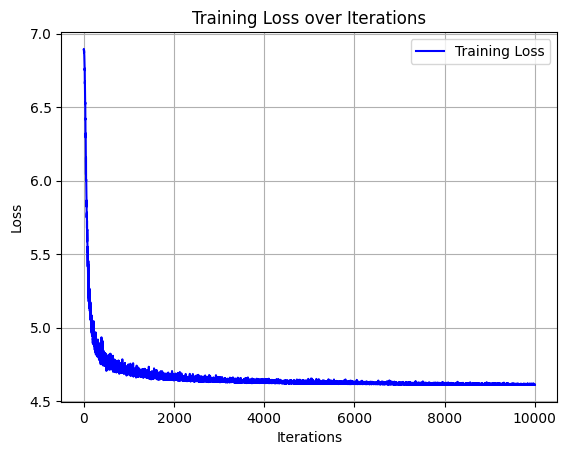

In [100]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list,label='Training Loss',color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()